In [2]:
import pandas as pd
df=pd.read_csv('/content/student_performance_dataset.csv')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
print("shape :", df.shape)

shape : (708, 10)


In [4]:
print("infos :")
print (df.info())

infos :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB
None


In [5]:
print(df.describe())

       Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
count            708.000000       708.000000        708.000000   
mean              26.132768        78.107722         77.871469   
std                8.877727        13.802802         14.402739   
min               10.000000        50.116970         50.000000   
25%               19.000000        67.550094         65.000000   
50%               27.000000        79.363046         79.000000   
75%               34.000000        89.504232         91.000000   
max               39.000000        99.967675        100.000000   

       Final_Exam_Score  
count        708.000000  
mean          58.771186  
std            6.705877  
min           50.000000  
25%           52.000000  
50%           59.500000  
75%           64.000000  
max           77.000000  


In [6]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

In [7]:
colonnes_a_encoder = [
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities',
    'Pass_Fail'
]

label_encoders = {}

for col in colonnes_a_encoder:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,1,31,68.267841,86,1,1,1,63,1
1,S136,1,16,78.222927,73,3,0,0,50,0
2,S209,0,21,87.525096,74,3,1,0,55,0
3,S458,0,27,92.076483,99,0,0,0,65,1
4,S078,0,37,98.655517,63,2,0,1,70,1


In [8]:
from sklearn.model_selection import train_test_split

X_corr = df_encoded.drop(['Final_Exam_Score', 'Pass_Fail', 'Student_ID'], axis=1)
y_corr = df_encoded['Final_Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.2, random_state=42)

print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


Taille du jeu d'entraînement : (566, 7)
Taille du jeu de test : (142, 7)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Évaluation du modèle de régression :")
print(f"MAE (erreur absolue moyenne)      : {mae:.2f}")
print(f"RMSE (racine de l'erreur quadratique moyenne) : {rmse:.2f}")
print(f"R² (coefficient de détermination) : {r2:.2f}")

Évaluation du modèle de régression :
MAE (erreur absolue moyenne)      : 3.10
RMSE (racine de l'erreur quadratique moyenne) : 3.80
R² (coefficient de détermination) : 0.66


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Évaluation du modèle Random Forest :")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.2f}")

Évaluation du modèle Random Forest :
MAE  : 2.00
RMSE : 2.91
R²   : 0.80


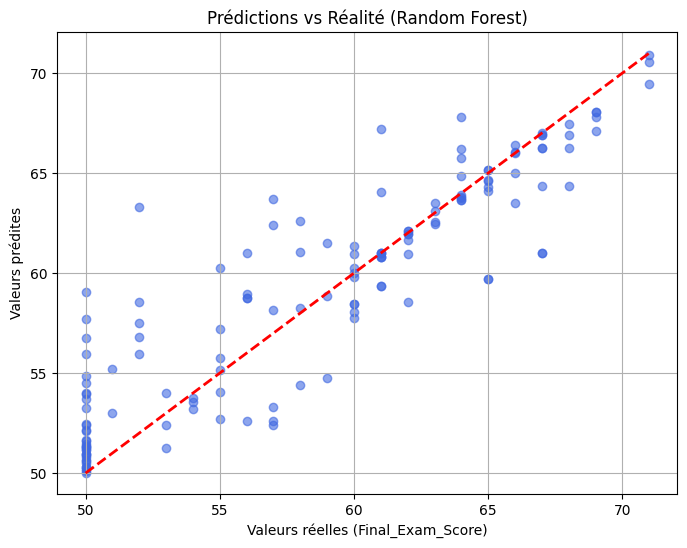

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Valeurs réelles (Final_Exam_Score)")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Réalité (Random Forest)")
plt.grid(True)
plt.show()

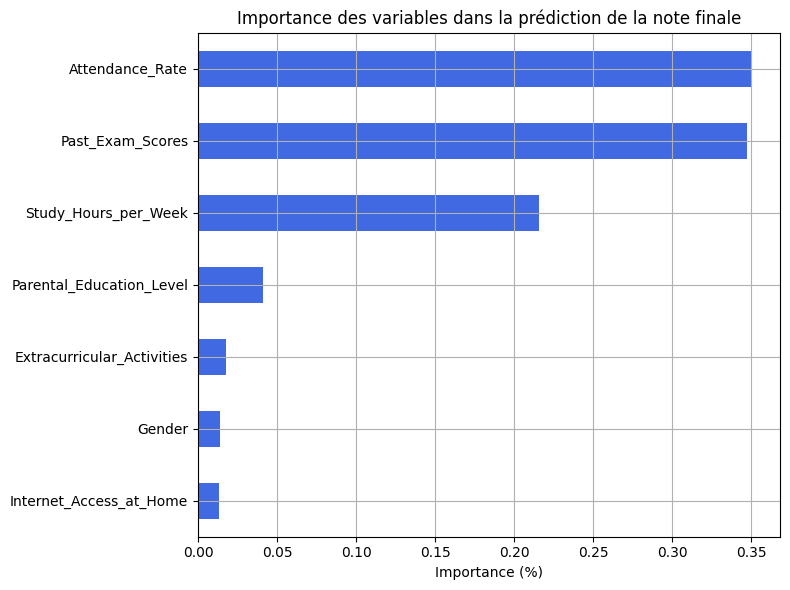

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_

feature_names = X_corr.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feature_importances.plot(kind='barh', color='royalblue')
plt.title("Importance des variables dans la prédiction de la note finale")
plt.xlabel("Importance (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_class = df_encoded.drop(['Pass_Fail', 'Student_ID', 'Final_Exam_Score'], axis=1)
y_class = df_encoded['Pass_Fail']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print("Train :", X_train_c.shape, "| Test :", X_test_c.shape)


Train : (566, 7) | Test : (142, 7)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

print("Accuracy :", accuracy_score(y_test_c, y_pred_c))
print("\nRapport de classification :\n", classification_report(y_test_c, y_pred_c))
print("\nMatrice de confusion :\n", confusion_matrix(y_test_c, y_pred_c))


Accuracy : 0.8169014084507042

Rapport de classification :
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        71
           1       0.79      0.86      0.82        71

    accuracy                           0.82       142
   macro avg       0.82      0.82      0.82       142
weighted avg       0.82      0.82      0.82       142


Matrice de confusion :
 [[55 16]
 [10 61]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf = rf_clf.predict(X_test_c)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy :", accuracy_score(y_test_c, y_pred_rf))
print(confusion_matrix(y_test_c, y_pred_rf))
print(classification_report(y_test_c, y_pred_rf))

Accuracy : 0.9154929577464789
[[61 10]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        71
           1       0.87      0.97      0.92        71

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142



In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_c, y_train_c)
y_pred_knn = knn_clf.predict(X_test_c)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy :", accuracy_score(y_test_c, y_pred_knn))
print(confusion_matrix(y_test_c, y_pred_knn))
print(classification_report(y_test_c, y_pred_knn))

Accuracy : 0.8169014084507042
[[55 16]
 [10 61]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        71
           1       0.79      0.86      0.82        71

    accuracy                           0.82       142
   macro avg       0.82      0.82      0.82       142
weighted avg       0.82      0.82      0.82       142



In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_c, y_train_c)
y_pred_tree = tree_clf.predict(X_test_c)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy :", accuracy_score(y_test_c, y_pred_tree))
print(confusion_matrix(y_test_c, y_pred_tree))
print(classification_report(y_test_c, y_pred_tree))

Accuracy : 0.8873239436619719
[[58 13]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        71
           1       0.84      0.96      0.89        71

    accuracy                           0.89       142
   macro avg       0.90      0.89      0.89       142
weighted avg       0.90      0.89      0.89       142



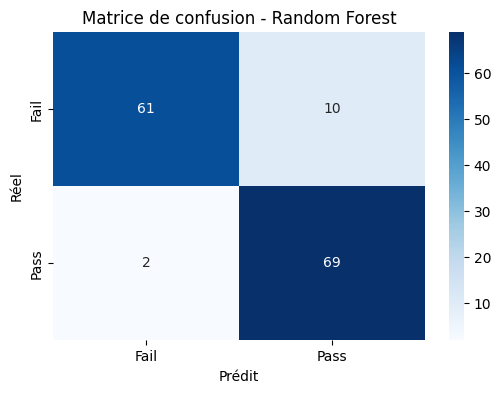

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_c, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


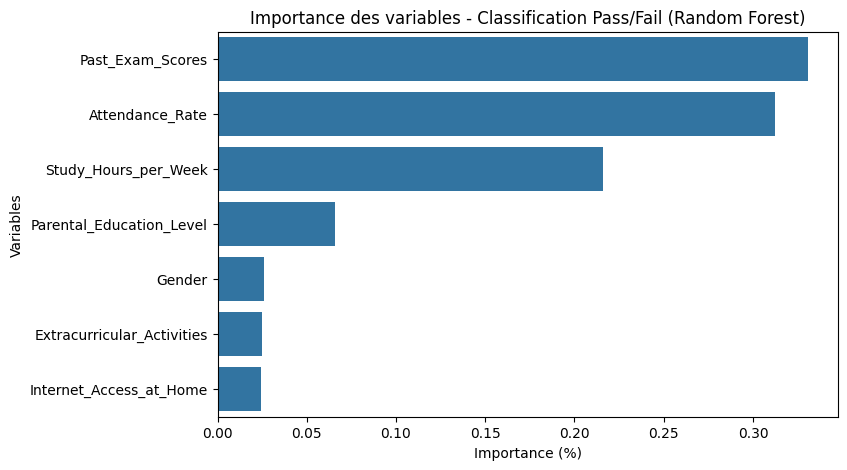

In [19]:
import pandas as pd
import numpy as np

importances = rf_clf.feature_importances_
features = X_train_c.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Importance des variables - Classification Pass/Fail (Random Forest)")
plt.xlabel("Importance (%)")
plt.ylabel("Variables")
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_cluster = df.copy()

cols_cat = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
for col in cols_cat:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col])

features = df_cluster.drop(columns=['Student_ID', 'Final_Exam_Score', 'Pass_Fail'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


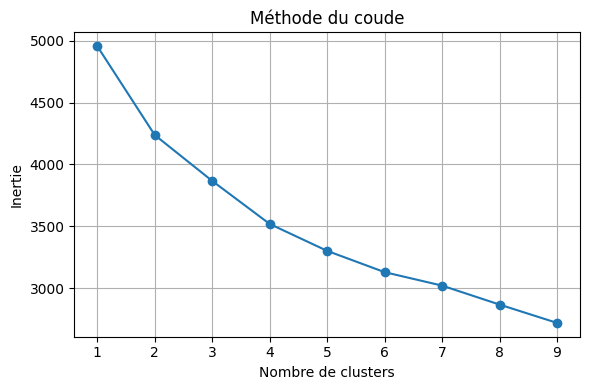

In [21]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)


In [23]:
cluster_summary = df_cluster.groupby('Cluster').mean(numeric_only=True)

print("Moyennes des variables numériques par cluster :")
print(cluster_summary)



Moyennes des variables numériques par cluster :
         Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
Cluster                                                                    
0           0.0             26.058201        79.334362         78.089947   
1           0.0             26.758065        77.311064         77.758065   
2           1.0             25.825826        77.856501         77.810811   

         Parental_Education_Level  Internet_Access_at_Home  \
Cluster                                                      
0                        1.492063                 0.423280   
1                        1.397849                 0.467742   
2                        1.435435                 0.480480   

         Extracurricular_Activities  Final_Exam_Score  
Cluster                                                
0                          1.000000         59.846561  
1                          0.000000         58.096774  
2                          0.474474 

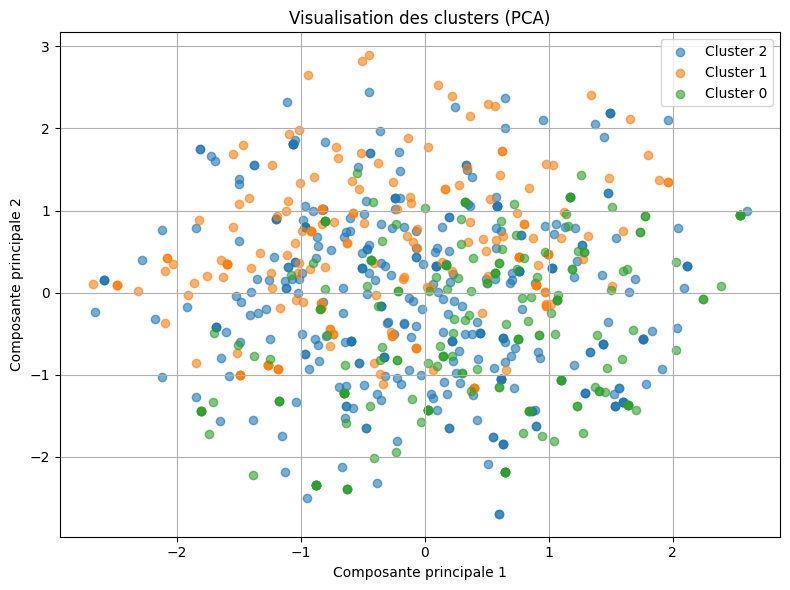

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("Visualisation des clusters (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

df_reg = df.copy()

cols_to_encode = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
for col in cols_to_encode:
    le = LabelEncoder()
    df_reg[col] = le.fit_transform(df_reg[col])

df_reg['Pass_Fail'] = df_reg['Pass_Fail'].map({'Fail': 0, 'Pass': 1})

X = df_reg.drop(columns=['Student_ID', 'Final_Exam_Score'])
y = df_reg['Final_Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg_lin = LinearRegression()
reg_lin.fit(X_train_scaled, y_train)
y_pred_lin = reg_lin.predict(X_test_scaled)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

results = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Random Forest'],
    'MAE': [mae_lin, mae_rf],
    'RMSE': [rmse_lin, rmse_rf],
    'R²': [r2_lin, r2_rf]
})

print(results)


                Modèle       MAE      RMSE        R²
0  Régression Linéaire  2.152751  2.583937  0.843067
1        Random Forest  1.519507  2.153808  0.890965


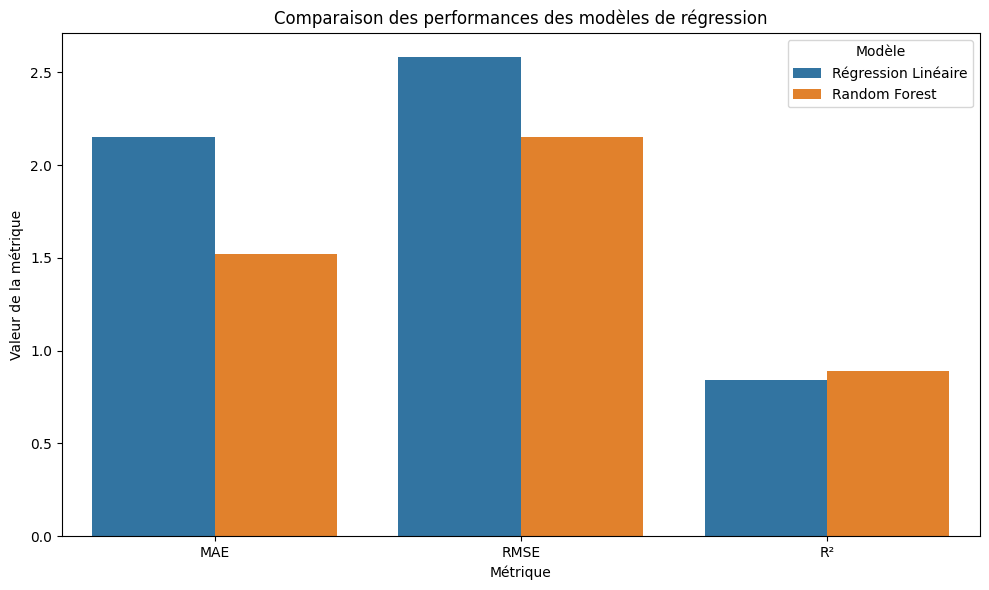

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Random Forest'],
    'MAE': [2.152751, 1.519507],
    'RMSE': [2.583937, 2.153808],
    'R²': [0.843067, 0.890965]
})

results_melted = results.melt(id_vars='Modèle', var_name='Métrique', value_name='Valeur')

plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x='Métrique', y='Valeur', hue='Modèle')
plt.title("Comparaison des performances des modèles de régression")
plt.ylabel("Valeur de la métrique")
plt.tight_layout()
plt.show()


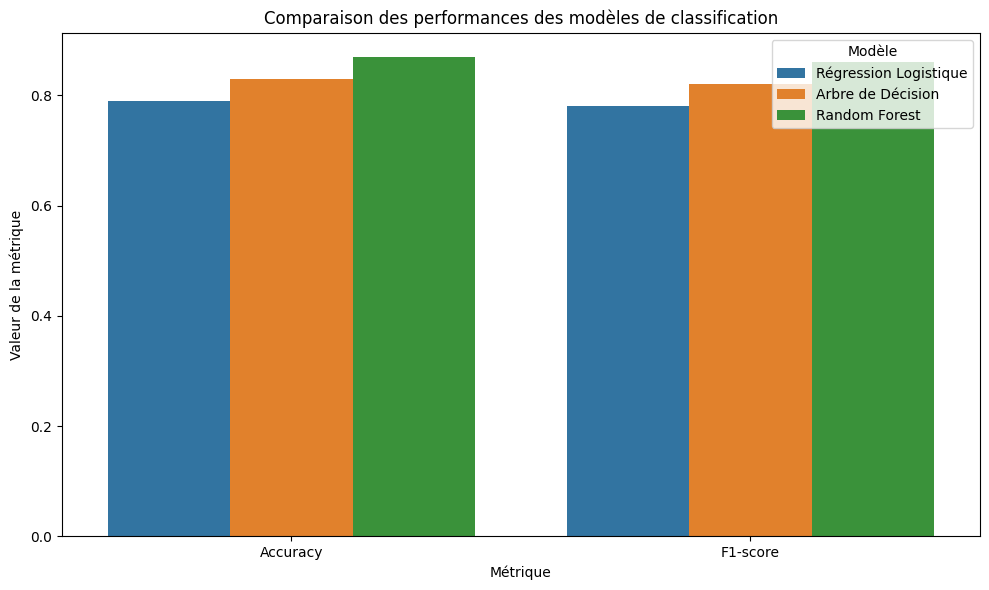

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Modèle': ['Régression Logistique', 'Arbre de Décision', 'Random Forest'],
    'Accuracy': [0.79, 0.83, 0.87],
    'F1-score': [0.78, 0.82, 0.86]
}

df_classif = pd.DataFrame(data)

df_melted = df_classif.melt(id_vars='Modèle', var_name='Métrique', value_name='Valeur')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Métrique', y='Valeur', hue='Modèle')
plt.title("Comparaison des performances des modèles de classification")
plt.ylabel("Valeur de la métrique")
plt.tight_layout()
plt.show()
